This file is about drawing bussproof style proof tree using graphviz.

I don't need this anymore because I found my own solution. https://stackoverflow.com/a/76337190

In [23]:
# pip install graphviz

import graphviz

dot_data = '''
digraph {
    A -> B;
    B -> C;
    C -> D;
    D -> A;
}
'''

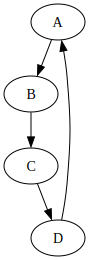

In [24]:
# We need brew install graphviz on mac for otherwise it will not work.

graph = graphviz.Source(dot_data)
display(graph)

In [25]:
# We can save the graph as a PDF file
graph.render('dir/my_graph')

# Then 'my_graph.pdf' will be created in the 'dir' directory.
# And the source text file 'my_graph' will be created in the 'dir' directory.
# No extension like .txt is used for the source text file.

# We can also save the graph as a PNG file
# graph.render('dir2/my_graph', format='png')
# There is no need to use png format. Use svg instead.

'dir/my_graph.pdf'

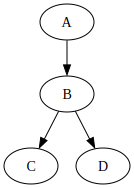

In [26]:
# We can draw tree diagram using graphviz as well.
# Say we have a tree like this:
# [A, [B, [C, D]]]
# We can draw it like this:

dot_data = '''
digraph {
    A -> B;
    B -> C;
    B -> D;
}
'''
graph = graphviz.Source(dot_data)
display(graph)

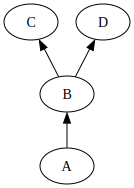

In [27]:
# We can draw upside-down.

dot_data = '''
digraph {
    A -> B;
    B -> C;
    B -> D;
    rankdir=BT; # Try rankdir=LR
  }
'''
graph = graphviz.Source(dot_data)
display(graph)


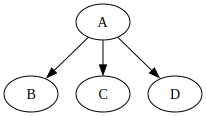

In [28]:
# Another example.
# [A, [B, C, D]]

dot_data = '''
digraph {
    A -> B;
    A -> C;
    A -> D;
}
'''
graph = graphviz.Source(dot_data)
display(graph)

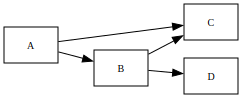

In [29]:
dot_data = '''
digraph {
    rankdir=LR
    node [fontsize=10 shape=box];
    A -> { B C };
    B -> {C D};
  }
'''
graph = graphviz.Source(dot_data)
display(graph)

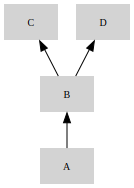

In [30]:
dot_data = '''
digraph {
    rankdir=BT
    node [fontsize=10 style=filled shape=none]; # Try without style.
    A -> B;
    B -> {C D};
  }
'''
graph = graphviz.Source(dot_data)
display(graph)

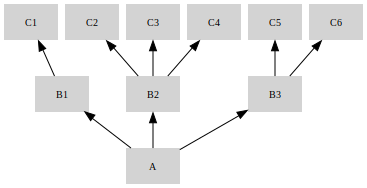

In [31]:
dot_data = '''
digraph {
    rankdir=BT
    node [fontsize=10 style=filled shape=none]; 
    nodesep=0.1;
    A -> {B1 B2 B3};
    B1 -> C1;
    B2 -> {C2 C3 C4};
    B3 -> {C5 C6 };
  }
'''
graph = graphviz.Source(dot_data)
display(graph)

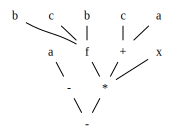

In [32]:
dot_data = '''
graph {
    rankdir=BT
    node [fontsize=12 shape=none width=.3 height=.3]; // Try without style.
    nodesep=0.2;
    ranksep=0.2;
    1 [label="-"];
    2 [label="-"];
    3 [label="a"];
    4 [label="*"];
    5 [label="f"];
    6 [label="+"];
    7 [label="c"];
    8 [label="a"];
    9 [label="b"];
    10 [label="c"];
    5 -- { 9 10 b}
    1 -- {2 4};
    2 -- 3;
    4 -- { 5 6 x};
    6 -- { 7 8 };
  }
'''
graph = graphviz.Source(dot_data)
display(graph)

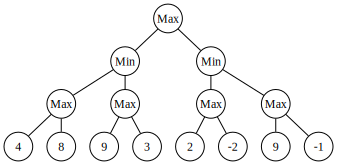

In [73]:
dot_data = '''
graph {
  node [width=.4 height=.4 fixedsize=true fontsize=12];
  nodesep=0.2;
  ranksep=0.2;
  1 [label="Max"];
  2 [label="Min"];
  3 [label="Min"];
  4 [label="Max"];
  5 [label="Max"];
  6 [label="Max"];
  7 [label="Max"];
  8 [label="4"];
  9 [label="8"];
  10 [label="9"];
  11 [label="3"];
  12 [label="2"];
  13 [label="-2"];
  14 [label="9"];
  15 [label="-1"];
  1 -- {2 3};
  2 -- {4 5};
  3 -- {6 7};
  4 -- {8 9};
  5 -- {10 11};
  6 -- {12 13};
  7 -- {14 15};
}
'''
graph = graphviz.Source(dot_data)
display(graph)

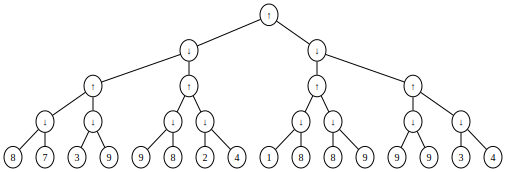

In [74]:
dot_data = '''
graph {
  node [width=.25 height=.3 fixedsize=true fontsize=10];
  nodesep=0.2;
  ranksep=0.2;
  1 [label="↑"];
  2 [label="↓"];
  3 [label="↓"];
  4 [label="↑"];
  5 [label="↑"];
  6 [label="↑"];
  7 [label="↑"];
  8  [label="↓"];
  9  [label="↓"];
  10 [label="↓"];
  11 [label="↓"];
  12 [label="↓"];
  13 [label="↓"];
  14 [label="↓"];
  15 [label="↓"];
  1 -- {2 3};
  2 -- {4 5};
  3 -- {6 7};
  4 -- {8 9};
  5 -- {10 11};
  6 -- {12 13};
  7 -- {14 15};
  16 [label="8"];
  17 [label="7"];
  18 [label="3"];
  19 [label="9"];
  20 [label="9"];
  21 [label="8"];
  22 [label="2"];
  23 [label="4"];
  24 [label="1"];
  25 [label="8"];
  26 [label="8"];
  27 [label="9"];
  28 [label="9"];
  29 [label="9"];
  30 [label="3"];
  31 [label="4"];
  8 -- {16 17};
  9 -- {18 19};
  10 -- {20 21};
  11 -- {22 23};
  12 -- {24 25};
  13 -- {26 27};
  14 -- {28 29};
  15 -- {30 31};
}
'''
graph = graphviz.Source(dot_data)
display(graph)

Finally, I've got a solution. 

I posed the problem of creating a busproof-style diagram in Jupyter Notebook, and a generous individual provided me with a solution utilizing the HTML label feature of Graphviz : https://graphviz.org/doc/info/shapes.html#html

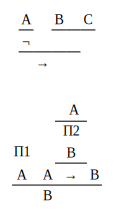

In [11]:
import graphviz

dot_data='''
graph B {
  rankdir=LR    // just for demo purposes

  { rank=same   // just for demo purposes  
  t1 [shape=plaintext,label=<
  <TABLE CELLSPACING="0" CELLPADDING="2" BORDER="0">
  <TR>
    <TD BORDER="1" sides="b">A</TD>
    <TD>&nbsp;</TD>
    <TD BORDER="1" sides="b">B</TD>
    <TD BORDER="1" sides="b">&nbsp;</TD>
    <TD BORDER="1" sides="b">C</TD></TR>
  <TR>
    <TD BORDER="1" sides="b">&not;</TD>
    <TD BORDER="1" sides="b">&nbsp;</TD>
    <TD BORDER="1" sides="b">&nbsp;</TD>
    <TD BORDER="1" sides="b">&or;</TD>
    <TD BORDER="0">&nbsp;</TD>
  </TR>
  <TR>
    <TD >&nbsp;</TD>
    <TD>&rarr;</TD>
    <TD >&nbsp;</TD>
    <TD >&nbsp;</TD>
    <TD >&nbsp;</TD>
  </TR>  
  </TABLE>>]

  t2 [shape=plaintext,label=<
  <TABLE CELLSPACING="0" CELLPADDING="2" BORDER="0">
  <TR>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="0" >&nbsp;</TD>    
    <TD BORDER="1" sides="b">&lfloor;A&rfloor;</TD>
    <TD BORDER="0">&nbsp;</TD>
  </TR>

  <TR>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="0" >&nbsp;</TD>    
    <TD BORDER="0" >&Pi;<sub>2</sub></TD>
    <TD BORDER="0">&nbsp;</TD>
  </TR>  
  <TR>
    <TD BORDER="0" >&Pi;<sub>1</sub></TD>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="0" >&nbsp;</TD>
    <TD BORDER="1" sides="b">B</TD>
    <TD BORDER="0">&nbsp;</TD>
  </TR>
    <TR>
    <TD BORDER="1" sides="b">A</TD>
    <TD BORDER="1" sides="b">&nbsp;</TD>
    <TD BORDER="1" sides="b">A</TD>
    <TD BORDER="1" sides="b">&rarr;</TD>
    <TD BORDER="1" sides="b">B</TD>    
  </TR>
  <TR>
    <TD >&nbsp;</TD>
    <TD>&nbsp;</TD>
    <TD >B</TD>
    <TD >&nbsp;</TD>
    <TD >&nbsp;</TD>
  </TR>  
  </TABLE>
  >]
  }
  t1--t2  [style=invis]
}
'''
graph = graphviz.Source(dot_data)
display(graph)

Now I have to do the following:

1. understand the graphviz code of the diagram
1. write a program that generates graphviz code from AST object


In [12]:
# One good thing on graphviz is that it can generate high resolution images.
# It even creates an svg file, which is a vector image and great for web pages.  
# PDF files are also vector images. But they are not usable in web pages.

# BTW we can convert it to svg using inkscape https://inkscape.org/ or cloudconvert https://cloudconvert.com/.  

https://inkscape.org/   

https://cloudconvert.com/

In [15]:
# This will generate a svg file "./html_solution_svg/buss1.svg".
# You can open it with a browser or image viewer or a VSCode extension such as SVG.
graph.render('html_solution_svg/buss1', format='svg')

'html_solution_svg/buss1.svg'